In [82]:
import numpy as np
import pandas as pd
import networkx as nx
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy import spatial
%matplotlib inline
sns.set_style("white")

In [71]:
def extend_users_df_with_relational_features(users_df):
    users_df['freebase_nmf_array'] = users_df[['freebase_nmf_0', 'freebase_nmf_1', 'freebase_nmf_2', 'freebase_nmf_3', 'freebase_nmf_4', 'freebase_nmf_5', 'freebase_nmf_6', 'freebase_nmf_7', 'freebase_nmf_8', 'freebase_nmf_9', 'freebase_nmf_10', 'freebase_nmf_11', 'freebase_nmf_12', 'freebase_nmf_13', 'freebase_nmf_14', 'freebase_nmf_15', 'freebase_nmf_16', 'freebase_nmf_17', 'freebase_nmf_18', 'freebase_nmf_19']].values.tolist()
    users_df['allmusic_genre_array'] = users_df[['allmusic_rnb', 'allmusic_rap', 'allmusic_electronic', 'allmusic_rock', 'allmusic_new age', 'allmusic_classical', 'allmusic_reggae', 'allmusic_blues', 'allmusic_country', 'allmusic_world', 'allmusic_folk', 'allmusic_easy listening', 'allmusic_jazz', 'allmusic_vocal', "allmusic_children's", 'allmusic_punk', 'allmusic_alternative', 'allmusic_spoken word', 'allmusic_pop', 'allmusic_heavy metal']].values.tolist()
    users_df['UAM_nmf_array'] = users_df[['UAM_nmf_0', 'UAM_nmf_1', 'UAM_nmf_2', 'UAM_nmf_3', 'UAM_nmf_4', 'UAM_nmf_5', 'UAM_nmf_6', 'UAM_nmf_7', 'UAM_nmf_8', 'UAM_nmf_9', 'UAM_nmf_10', 'UAM_nmf_11', 'UAM_nmf_12', 'UAM_nmf_13', 'UAM_nmf_14', 'UAM_nmf_15', 'UAM_nmf_16', 'UAM_nmf_17', 'UAM_nmf_18', 'UAM_nmf_19']].values.tolist()
    users_df['allmusic_genre_array'] = users_df['allmusic_genre_array'].apply(lambda x: np.array(x))
    users_df['freebase_nmf_array'] = users_df['freebase_nmf_array'].apply(lambda x: np.array(x))
    users_df['UAM_nmf_array'] = users_df['UAM_nmf_array'].apply(lambda x: np.array(x))
    return users_df

def calculate_cosine_similarity_for_vector_features(df, columns):
    for column in columns:
        df['cosine_similarity_'+column] = df.apply(lambda x: cosine_similarity(x['user1_'+column], x['user2_'+column]), axis=1)
    return df

def cosine_similarity(list1, list2):
    return 1 - spatial.distance.cosine(list1, list2)

In [110]:
links_df = pd.read_csv('../data/dataframes/links_dfs/0/links_df_full.csv', index_col=False)
links_df = links_df[links_df.label==1]
users_df = pd.read_csv('../data/dataframes/users_dfs/users_df_no_missing_values.csv', index_col=False)
users_df = extend_users_df_with_relational_features(users_df)

users1_df = pd.DataFrame([x for x in links_df['user1_user_id'].values]).rename(columns={0:'user_id'}).merge(users_df, how='left', on='user_id').add_prefix('user1_')
users2_df = pd.DataFrame([x for x in links_df['user2_user_id'].values]).rename(columns={0:'user_id'}).merge(users_df, how='left', on='user_id').add_prefix('user2_')
links_df = pd.concat([users1_df, users2_df.set_index(users1_df.index)], axis=1)
links_df['cosine_similarity_'+'UAM_nmf_array'] = links_df.apply(lambda x: cosine_similarity(x['user1_'+'UAM_nmf_array'], x['user2_'+'UAM_nmf_array']), axis=1)
links_df['cosine_similarity_'+'freebase_nmf_array'] = links_df.apply(lambda x: cosine_similarity(x['user1_'+'freebase_nmf_array'], x['user2_'+'freebase_nmf_array']), axis=1)
links_df['label'] = 1
links_df = calculate_cosine_similarity_for_vector_features(links_df, ['allmusic_genre_array', 'freebase_nmf_array', 'UAM_nmf_array'])

In [111]:
edges = list(zip(links_df.user1_user_id, links_df.user2_user_id))
G = nx.Graph()
for edge in edges:
    G.add_edge(edge[0], edge[1])

In [112]:
df_subset = links_df[['user1_playcount_lognorm', 
                'user1_novelty_artist_avg_month', 
                'user1_novelty_artist_avg_6months', 
                'user1_novelty_artist_avg_year',
                'user1_mainstreaminess_avg_month',
                'user1_mainstreaminess_avg_6months',
                'user1_mainstreaminess_avg_year',
                'user1_mainstreaminess_global',
                'user1_cnt_listeningevents_lognorm',
                'user1_cnt_distinct_tracks_lognorm',
                'user1_cnt_distinct_artists_lognorm',
                'user1_cnt_listeningevents_per_week_lognorm',
                'user1_allmusic_weighted_average_diversity',
                'user1_allmusic_genre_coverage_diversity',
                'user1_allmusic_entropy_diversity',
                'user1_freebase_weighted_average_diversity',
                'user1_freebase_genre_coverage_diversity',
                'user1_freebase_entropy_diversity',
                'user2_playcount_lognorm', 
                'user2_novelty_artist_avg_month', 
                'user2_novelty_artist_avg_6months', 
                'user2_novelty_artist_avg_year',
                'user2_mainstreaminess_avg_month',
                'user2_mainstreaminess_avg_6months',
                'user2_mainstreaminess_avg_year',
                'user2_mainstreaminess_global',
                'user2_cnt_listeningevents_lognorm',
                'user2_cnt_distinct_tracks_lognorm',
                'user2_cnt_distinct_artists_lognorm',
                'user2_cnt_listeningevents_per_week_lognorm',
                'user2_allmusic_weighted_average_diversity',
                'user2_allmusic_genre_coverage_diversity',
                'user2_allmusic_entropy_diversity',
                'user2_freebase_weighted_average_diversity',
                'user2_freebase_genre_coverage_diversity',
                'user2_freebase_entropy_diversity',
                'cosine_similarity_allmusic_genre_array',
                'cosine_similarity_freebase_nmf_array',
                'cosine_similarity_UAM_nmf_array'
                     ]]
df_subset['user1_playcount_lognorm'].fillna(df_subset['user1_playcount_lognorm'].mean(), inplace=True)
df_subset['user1_allmusic_weighted_average_diversity'].fillna(df_subset['user1_allmusic_weighted_average_diversity'].mean(), inplace=True)
df_subset['user1_allmusic_genre_coverage_diversity'].fillna(df_subset['user1_allmusic_genre_coverage_diversity'].mean(), inplace=True)
df_subset['user1_allmusic_entropy_diversity'].fillna(df_subset['user1_allmusic_entropy_diversity'].mean(), inplace=True)
df_subset['user1_freebase_weighted_average_diversity'].fillna(df_subset['user1_freebase_weighted_average_diversity'].mean(), inplace=True)
df_subset['user1_freebase_genre_coverage_diversity'].fillna(df_subset['user1_freebase_genre_coverage_diversity'].mean(), inplace=True)
df_subset['user1_freebase_entropy_diversity'].fillna(df_subset['user1_freebase_entropy_diversity'].mean(), inplace=True)

df_subset['user2_playcount_lognorm'].fillna(df_subset['user2_playcount_lognorm'].mean(), inplace=True)
df_subset['user2_allmusic_weighted_average_diversity'].fillna(df_subset['user2_allmusic_weighted_average_diversity'].mean(), inplace=True)
df_subset['user2_allmusic_genre_coverage_diversity'].fillna(df_subset['user2_allmusic_genre_coverage_diversity'].mean(), inplace=True)
df_subset['user2_allmusic_entropy_diversity'].fillna(df_subset['user2_allmusic_entropy_diversity'].mean(), inplace=True)
df_subset['user2_freebase_weighted_average_diversity'].fillna(df_subset['user2_freebase_weighted_average_diversity'].mean(), inplace=True)
df_subset['user2_freebase_genre_coverage_diversity'].fillna(df_subset['user2_freebase_genre_coverage_diversity'].mean(), inplace=True)
df_subset['user2_freebase_entropy_diversity'].fillna(df_subset['user2_freebase_entropy_diversity'].mean(), inplace=True)

df_subset['cosine_similarity_allmusic_genre_array'].fillna(df_subset['cosine_similarity_allmusic_genre_array'].mean(), inplace=True)
df_subset['cosine_similarity_freebase_nmf_array'].fillna(df_subset['cosine_similarity_freebase_nmf_array'].mean(), inplace=True)
df_subset['cosine_similarity_UAM_nmf_array'].fillna(df_subset['cosine_similarity_UAM_nmf_array'].mean(), inplace=True)

/tmp/ipykernel_3146/721040176.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['user1_playcount_lognorm'].fillna(df_subset['user1_playcount_lognorm'].mean(), inplace=True)
/tmp/ipykernel_3146/721040176.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['user1_allmusic_weighted_average_diversity'].fillna(df_subset['user1_allmusic_weighted_average_diversity'].mean(), inplace=True)
/tmp/ipykernel_3146/721040176.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

In [113]:
assortativity_coefficients = {}
for column in df_subset.columns:
    if '2' in column or 'label' in column or 'cosine' in column:
        continue
    assortativity_coefficients[column] = round(pearsonr(df_subset[column], df_subset[column.replace('1', '2')])[0], 3)

print('Assortativity coefficients for numeric features: \n')

for i in sorted(assortativity_coefficients.items(), key=lambda x: x[1], reverse=True):
	print(i[0], i[1])

Assortativity coefficients for numeric features: 

user1_freebase_weighted_average_diversity 0.229
user1_allmusic_weighted_average_diversity 0.182
user1_allmusic_entropy_diversity 0.179
user1_freebase_genre_coverage_diversity 0.149
user1_freebase_entropy_diversity 0.14
user1_novelty_artist_avg_6months 0.112
user1_cnt_distinct_artists_lognorm 0.106
user1_mainstreaminess_global 0.105
user1_allmusic_genre_coverage_diversity 0.092
user1_cnt_listeningevents_per_week_lognorm 0.09
user1_cnt_distinct_tracks_lognorm 0.079
user1_novelty_artist_avg_month 0.063
user1_novelty_artist_avg_year 0.057
user1_mainstreaminess_avg_month 0.055
user1_playcount_lognorm 0.053
user1_mainstreaminess_avg_6months 0.049
user1_mainstreaminess_avg_year 0.043
user1_cnt_listeningevents_lognorm 0.027


In [114]:
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", title='', **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (N, M).
    row_labels
        A list or array of length N with the labels for the rows.
    col_labels
        A list or array of length M with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)
    ax.set_title(title)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=False, bottom=False,
                   labeltop=False, labelbottom=True)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    #ax.spines[:].set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=("black", "white"),
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A pair of colors.  The first is used for values below a threshold,
        the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            if j > i:
                continue
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

In [115]:
namings_map = {
    'mainstreaminess_global':'mainstreaminess',
    'freebase_weighted_average_diversity':'diversity',
    'novelty_artist_avg_6months':'novelty'
}
nodes_per_group = {
    'mainstreaminess_global': users_df.groupby(['user_groups_mainstreaminess_global']).count().user_id.to_dict(),
    'freebase_weighted_average_diversity': users_df.groupby(['user_groups_freebase_weighted_average_diversity']).count().user_id.to_dict(),
    'novelty_artist_avg_6months': users_df.groupby(['user_groups_novelty_artist_avg_6months']).count().user_id.to_dict()
}
keys = ['mainstreaminess_global|high', 
        'mainstreaminess_global|medium', 
        'mainstreaminess_global|low',
        'freebase_weighted_average_diversity|high',
        'freebase_weighted_average_diversity|medium',
        'freebase_weighted_average_diversity|low',
        'novelty_artist_avg_6months|high',
        'novelty_artist_avg_6months|medium',
        'novelty_artist_avg_6months|low']
total_edges = len(links_df)
total_nodes = len(users_df)
results = {}
for key1 in keys:
    for key2 in keys:
        metric1 = key1.split('|')[0]
        user_group1 = key1.split('|')[1]
        metric2 = key2.split('|')[0]
        user_group2 = key2.split('|')[1]
        if key1 == key2:
            expected_edges = (nodes_per_group[metric1][user_group1]/total_nodes)*(nodes_per_group[metric2][user_group2]/total_nodes) * total_edges
            real_edges = len(links_df[(links_df['user1_user_groups_'+metric1+'_'+user_group1]==True)&((links_df['user2_user_groups_'+metric2+'_'+user_group2]==True))])
            cosine_similarity_allmusic_genre_array_values = links_df[(links_df['user1_user_groups_'+metric1+'_'+user_group1]==True)&((links_df['user2_user_groups_'+metric2+'_'+user_group2]==True))].cosine_similarity_allmusic_genre_array.values
            cosine_similarity_freebase_nmf_array_values = links_df[(links_df['user1_user_groups_'+metric1+'_'+user_group1]==True)&((links_df['user2_user_groups_'+metric2+'_'+user_group2]==True))].cosine_similarity_freebase_nmf_array.values
            cosine_similarity_UAM_nmf_array_values = links_df[(links_df['user1_user_groups_'+metric1+'_'+user_group1]==True)&((links_df['user2_user_groups_'+metric2+'_'+user_group2]==True))].cosine_similarity_UAM_nmf_array.values
        else:
            expected_edges = 2*(nodes_per_group[metric1][user_group1]/total_nodes)*(nodes_per_group[metric2][user_group2]/total_nodes) * total_edges
            real_edges = len(links_df[(links_df['user1_user_groups_'+metric1+'_'+user_group1]==True)&((links_df['user2_user_groups_'+metric2+'_'+user_group2]==True))]) + len(links_df[(links_df['user1_user_groups_'+metric2+'_'+user_group2]==True)&((links_df['user2_user_groups_'+metric1+'_'+user_group1]==True))])
            cosine_similarity_allmusic_genre_array_values = np.concatenate([links_df[(links_df['user1_user_groups_'+metric1+'_'+user_group1]==True)&((links_df['user2_user_groups_'+metric2+'_'+user_group2]==True))].cosine_similarity_allmusic_genre_array.values, links_df[(links_df['user1_user_groups_'+metric2+'_'+user_group2]==True)&((links_df['user2_user_groups_'+metric1+'_'+user_group1]==True))].cosine_similarity_allmusic_genre_array.values])
            cosine_similarity_freebase_nmf_array_values = np.concatenate([links_df[(links_df['user1_user_groups_'+metric1+'_'+user_group1]==True)&((links_df['user2_user_groups_'+metric2+'_'+user_group2]==True))].cosine_similarity_freebase_nmf_array.values, links_df[(links_df['user1_user_groups_'+metric2+'_'+user_group2]==True)&((links_df['user2_user_groups_'+metric1+'_'+user_group1]==True))].cosine_similarity_freebase_nmf_array.values])
            cosine_similarity_UAM_nmf_array_values = np.concatenate([links_df[(links_df['user1_user_groups_'+metric1+'_'+user_group1]==True)&((links_df['user2_user_groups_'+metric2+'_'+user_group2]==True))].cosine_similarity_UAM_nmf_array.values, links_df[(links_df['user1_user_groups_'+metric2+'_'+user_group2]==True)&((links_df['user2_user_groups_'+metric1+'_'+user_group1]==True))].cosine_similarity_UAM_nmf_array.values])
        results_key1 = user_group1.capitalize() + ' ' + namings_map[metric1]
        results_key2 = user_group2.capitalize() + ' ' + namings_map[metric2]
        results[(results_key1,results_key2)] = {
            'expected_edges':expected_edges, 
            'real_edges':real_edges, 
            'real_expected_ratio': real_edges/expected_edges,
            'cosine_similarity_allmusic_mean':np.nanmean(cosine_similarity_allmusic_genre_array_values),
            'cosine_similarity_freebase_nmf_mean':np.nanmean(cosine_similarity_freebase_nmf_array_values),
            'cosine_similarity_UAM_nmf_mean':np.nanmean(cosine_similarity_UAM_nmf_array_values),
            'cosine_similarity_allmusic_diff_to_mean':np.nanmean(cosine_similarity_allmusic_genre_array_values)/np.nanmean(links_df.cosine_similarity_allmusic_genre_array),
            'cosine_similarity_freebase_diff_to_mean':np.nanmean(cosine_similarity_freebase_nmf_array_values)/np.nanmean(links_df.cosine_similarity_freebase_nmf_array),
            'cosine_similarity_UAM_nmf_diff_to_mean':np.nanmean(cosine_similarity_UAM_nmf_array_values)/np.nanmean(links_df.cosine_similarity_UAM_nmf_array),
            'cosine_similarity_allmusic_diff_to_median':np.nanmean(cosine_similarity_allmusic_genre_array_values)/np.nanmedian(links_df.cosine_similarity_allmusic_genre_array),
            'cosine_similarity_freebase_diff_to_median':np.nanmean(cosine_similarity_freebase_nmf_array_values)/np.nanmedian(links_df.cosine_similarity_freebase_nmf_array),
            'cosine_similarity_UAM_nmf_diff_to_median':np.nanmean(cosine_similarity_UAM_nmf_array_values)/np.nanmedian(links_df.cosine_similarity_UAM_nmf_array)
        }

In [116]:
len(results)

81

In [117]:
len(links_df)

78989

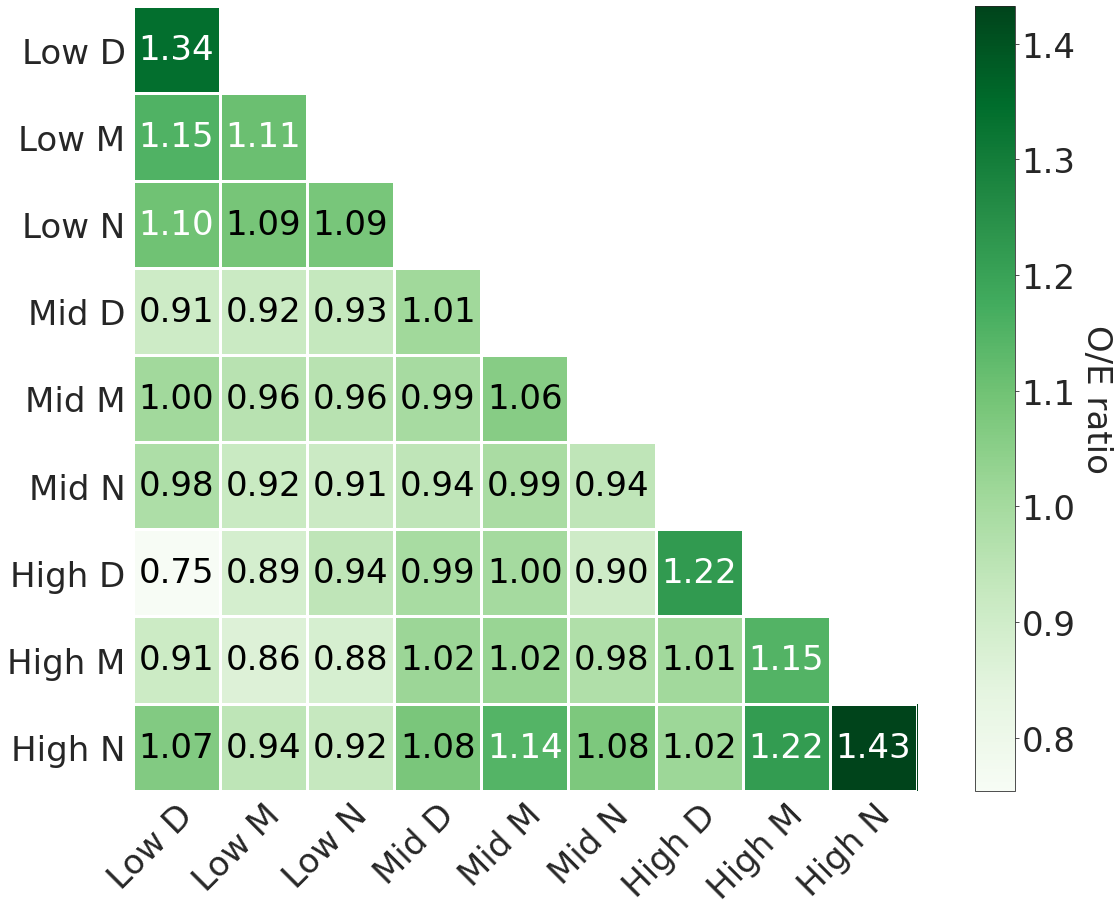

In [118]:
plt.rcParams.update({'figure.figsize' : (18,13.5), 'font.size': 34})

metric = 'real_expected_ratio'
values = np.zeros((len(indices), len(indices)))
for i in range(len(indices)):
    for j in range(len(indices)):
        if j > i:
            values[i,j] = np.nan
        else:
            values[i,j] = results[(indices[i], indices[j])][metric]

fig, ax = plt.subplots()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

im, cbar = heatmap(values, indices_short, indices_short, ax=ax,
                   cmap="Greens", cbarlabel="O/E ratio",
                  title='')
texts = annotate_heatmap(im, valfmt="{x:.2f}")

fig.tight_layout()
plt.savefig('../figures/homophily_all_user_groups.pdf',dpi=300, bbox_inches = "tight")

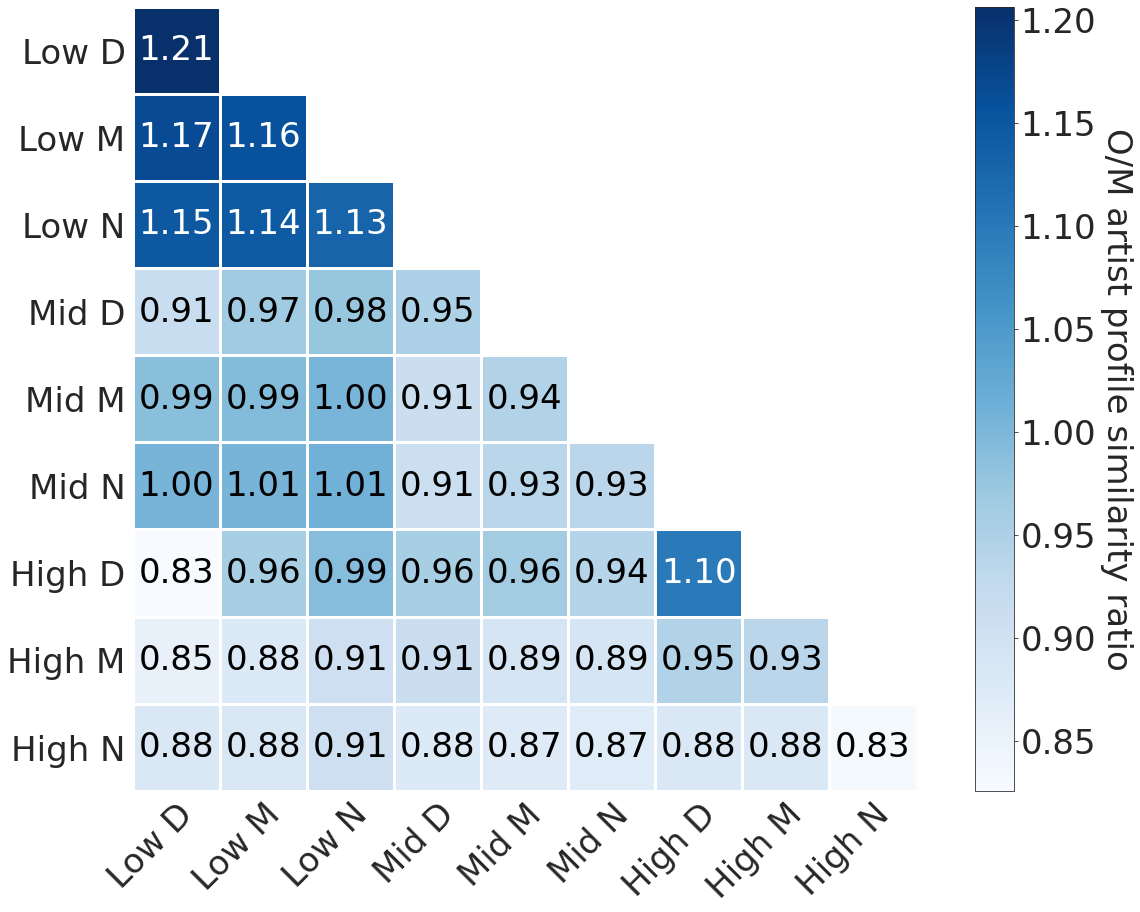

In [119]:
plt.rcParams.update({'figure.figsize' : (18,13.5), 'font.size': 34})
metric = 'cosine_similarity_UAM_nmf_diff_to_mean'
values = np.zeros((len(indices), len(indices)))
for i in range(len(indices)):
    for j in range(len(indices)):
        if j > i:
            values[i,j] = np.nan
        else:
            values[i,j] = results[(indices[i], indices[j])][metric]

fig, ax = plt.subplots()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

im, cbar = heatmap(values, indices_short, indices_short, ax=ax,
                   cmap="Blues", cbarlabel="O/M artist profile similarity ratio")
texts = annotate_heatmap(im, valfmt="{x:.2f}")

fig.tight_layout()
plt.savefig('../figures/UAM_nmf_diff_to_mean_cosine_all_user_groups_ratio.pdf',dpi=300, bbox_inches = "tight")

In [120]:
degrees = [d for v, d in G.degree()]
G_conf=nx.configuration_model(degrees)
G_conf=nx.Graph(G_conf)
G_conf.remove_edges_from(nx.selfloop_edges(G_conf))

node_ids = list(G.nodes)
source_nodes_conf = []
target_nodes_conf = []
for edge in G_conf.edges:
    source_nodes_conf.append(node_ids[edge[0]])
    target_nodes_conf.append(node_ids[edge[1]])

In [121]:
user1_df = pd.DataFrame(source_nodes_conf).rename(columns={0:'user_id'}).merge(users_df[['user_id', 'UAM_nmf_array', 'freebase_nmf_array']], on='user_id', how='left').rename(columns={'user_id':'user1_user_id', 'UAM_nmf_array':'user1_UAM_nmf_array', 'freebase_nmf_array':'user1_freebase_array'})
user2_df = pd.DataFrame(target_nodes_conf).rename(columns={0:'user_id'}).merge(users_df[['user_id', 'UAM_nmf_array', 'freebase_nmf_array']], on='user_id', how='left').rename(columns={'user_id':'user2_user_id', 'UAM_nmf_array':'user2_UAM_nmf_array', 'freebase_nmf_array':'user2_freebase_array'})

In [122]:
profile_similarity_conf_df = pd.concat([user1_df, user2_df], axis=1)
profile_similarity_conf_df['cosine_similarity_'+'UAM_nmf_array'] = profile_similarity_conf_df.apply(lambda x: cosine_similarity(x['user1_'+'UAM_nmf_array'], x['user2_'+'UAM_nmf_array']), axis=1)
profile_similarity_conf_df['cosine_similarity_'+'freebase_array'] = profile_similarity_conf_df.apply(lambda x: cosine_similarity(x['user1_'+'freebase_array'], x['user2_'+'freebase_array']), axis=1)

In [123]:
profile_similarity_conf_df

,user1_user_id,user1_UAM_nmf_array,user1_freebase_array,user2_user_id,user2_UAM_nmf_array,user2_freebase_array,cosine_similarity_UAM_nmf_array,cosine_similarity_freebase_array
0,7758024,"[0.0, 0.0043313465520942, 0.0006912517919611, ...","[0.0, 0.0028793167061711, 0.0001421474466447, ...",8229550,"[0.0010513118822918, 0.000418507148871, 0.0, 0...","[0.0, 0.0027840708977222, 0.0, 0.0077826452340...",0.151424,0.390815
1,34641085,"[0.0, 0.0028671474503535, 0.0079667989212903, ...","[0.0, 0.0028839399196506, 8.140496570787023e-0...",30334310,"[0.0010104575160173, 0.0, 0.0034240207088531, ...","[8.874085720243048e-06, 0.002885274359116, 0.0...",0.496664,0.866251
2,9484073,"[0.0, 0.0, 0.0, 0.0, 2.423523153179948e-06, 0....","[0.0, 0.0028668641748282, 0.0, 0.0, 0.0, 0.0, ...",49616264,"[0.0, 0.0003414717478543, 0.0, 0.0, 0.00053783...","[2.470873214684165e-05, 0.0028898162657631, 0....",0.049381,0.617072
3,9484073,"[0.0, 0.0, 0.0, 0.0, 2.423523153179948e-06, 0....","[0.0, 0.0028668641748282, 0.0, 0.0, 0.0, 0.0, ...",20224227,"[0.0, 0.0030359677238657, 0.0003407902610699, ...","[0.0, 0.0028763202383043, 0.0, 0.0, 0.0, 0.000...",0.000000,0.364992
4,9484073,"[0.0, 0.0, 0.0, 0.0, 2.423523153179948e-06, 0....","[0.0, 0.0028668641748282, 0.0, 0.0, 0.0, 0.0, ...",38846896,"[0.0, 0.0, 7.250518612318724e-05, 0.0, 4.49766...","[0.0, 0.0028850448641279, 0.0, 0.0005168204063...",0.241781,0.608274
...,...,...,...,...,...,...,...,...
78164,6224798,"[0.0, 0.0112179511511807, 0.0, 0.0, 0.0, 0.0, ...","[0.0028907873331493, 0.0028349250080878, 0.008...",46726403,"[0.0, 0.0, 0.0, 0.0016501464792739, 0.00038992...","[3.591379090301488e-05, 0.0028921507984266, 0....",0.217826,0.233048
78165,48664519,"[0.0, 0.0100862604118473, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0028910530597246, 0.0, 0.0, 0.0, 5.456...",26676090,"[0.0, 0.004487106251842, 0.0, 0.00091177433546...","[5.9509971546383615e-05, 0.0028930843249512, 5...",0.127103,0.984417
78166,26066701,"[0.0, 0.0, 0.0, 0.0, 0.0001225880422733, 0.0, ...","[0.0, 0.0028937243125608, 0.0, 0.0, 0.0, 0.0, ...",2526456,"[0.0, 0.0, 0.0, 0.0011035475345277, 0.00276309...","[0.0, 0.002853573902747, 0.0, 0.0, 0.002451651...",0.022306,0.416987
78167,28041118,"[0.0, 0.007729137752581, 0.0, 0.00112963397495...","[0.0, 0.0028917238067894, 0.0, 0.0, 0.0, 0.0, ...",7807102,"[0.007179764783663, 0.0, 0.0, 0.0, 7.828669680...","[0.0, 0.0028747614215826, 0.0, 0.0019279084893...",0.000674,0.741749


In [124]:
print(df_subset['cosine_similarity_UAM_nmf_array'].mean())
print(df_subset['cosine_similarity_UAM_nmf_array'].std())
print(profile_similarity_conf_df['cosine_similarity_UAM_nmf_array'].mean())
print(profile_similarity_conf_df['cosine_similarity_UAM_nmf_array'].std())

0.43118935384433416
0.3080775076961744
0.24177986147260158
0.2587300112912792


/home/tduricic/01_Development/tools/anaconda3/envs/lastfm/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


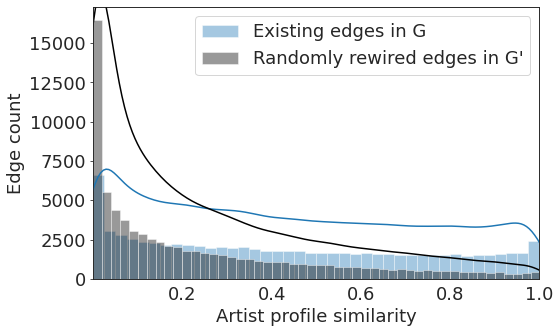

In [125]:
plt.rcParams.update({'figure.figsize' : (8,5), 'font.size': 18})
f,ax1 = plt.subplots()
sns.distplot(df_subset['cosine_similarity_UAM_nmf_array'].values,kde=False,ax=ax1, label='Existing edges in G')
sns.distplot(profile_similarity_conf_df['cosine_similarity_UAM_nmf_array'].values,kde=False,ax=ax1, label='Randomly rewired edges in G\'', color='black')
plt.legend();
ax2 = ax1.twinx()
ax2.set_ylim(0,4)
ax2.yaxis.set_ticks([])
sns.kdeplot(df_subset['cosine_similarity_UAM_nmf_array'].values,ax=ax2)
sns.kdeplot(profile_similarity_conf_df['cosine_similarity_UAM_nmf_array'].values,ax=ax2, color='black')
ax1.set_xlabel('Artist profile similarity')
ax1.set_ylabel('Edge count')
ax2.set_xticks([0.2,0.4,0.6,0.8,1])
# ax.set_xticklabels(['zero','two','four','six'])
plt.xlim(0, 1.0)
plt.savefig('../figures/existing_vs_random_listening_profile_similarity.pdf',dpi=300, bbox_inches = "tight")

In [126]:
# Create random graph by preserving number of connections for multiple dimensions
edge_groups = {}

for index, row in links_df.groupby(['user1_user_groups_mainstreaminess_global', 
                  'user1_user_groups_novelty_artist_avg_6months', 
                  'user1_user_groups_freebase_weighted_average_diversity', 
                  'user2_user_groups_mainstreaminess_global', 
                  'user2_user_groups_novelty_artist_avg_6months', 
                  'user2_user_groups_freebase_weighted_average_diversity']).size().reset_index(name='Count').iterrows():
    edge_groups[((
        row['user1_user_groups_mainstreaminess_global'],
        row['user1_user_groups_novelty_artist_avg_6months'],
        row['user1_user_groups_freebase_weighted_average_diversity']
    ),(
        row['user2_user_groups_mainstreaminess_global'],
        row['user2_user_groups_novelty_artist_avg_6months'],
        row['user2_user_groups_freebase_weighted_average_diversity'],
    ))] = links_df[
        (links_df['user1_user_groups_mainstreaminess_global']==row['user1_user_groups_mainstreaminess_global'])&
        (links_df['user1_user_groups_novelty_artist_avg_6months']==row['user1_user_groups_novelty_artist_avg_6months'])&
        (links_df['user1_user_groups_freebase_weighted_average_diversity']==row['user1_user_groups_freebase_weighted_average_diversity'])&
        (links_df['user2_user_groups_mainstreaminess_global']==row['user2_user_groups_mainstreaminess_global'])&
        (links_df['user2_user_groups_novelty_artist_avg_6months']==row['user2_user_groups_novelty_artist_avg_6months'])&
        (links_df['user2_user_groups_freebase_weighted_average_diversity']==row['user2_user_groups_freebase_weighted_average_diversity'])
    ][['user1_user_id', 'user2_user_id']]
    
merged_edge_groups = {}
for key in edge_groups:
    if key in merged_edge_groups or ((key[1][0], key[1][1], key[1][2]), (key[0][0], key[0][1], key[0][2])) in merged_edge_groups:
        continue
    if ((key[1][0], key[1][1], key[1][2]), (key[0][0], key[0][1], key[0][2])) in edge_groups and (key[0][0], key[0][1], key[0][2]) != (key[1][0], key[1][1], key[1][2]):
        tmp_df = pd.DataFrame()
        tmp_df['user1_user_id'] = pd.Series(edge_groups[((key[1][0], key[1][1], key[1][2]), (key[0][0], key[0][1], key[0][2]))]['user2_user_id'])
        tmp_df['user2_user_id'] = pd.Series(edge_groups[((key[1][0], key[1][1], key[1][2]), (key[0][0], key[0][1], key[0][2]))]['user1_user_id'])
        merged_edge_groups[key] = edge_groups[key].append(tmp_df, ignore_index=True)
    else:
        merged_edge_groups[key] = edge_groups[key]
        
shuffled_edge_groups = {}
shuffled_links_mul_random_df = pd.DataFrame(columns=['user1_user_id', 'user2_user_id'])
for key in merged_edge_groups:
    tmp_df = pd.DataFrame(merged_edge_groups[key])
    user2_df = tmp_df.drop('user1_user_id', axis=1)
    user2_df = user2_df.sample(frac=1, random_state=0)
    tmp_df['user2_user_id'] = user2_df['user2_user_id'].values
    shuffled_edge_groups[key] = tmp_df
    shuffled_links_mul_random_df = shuffled_links_mul_random_df.append(tmp_df, ignore_index=True)

/tmp/ipykernel_3146/3017284537.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_edge_groups[key] = edge_groups[key].append(tmp_df, ignore_index=True)
/tmp/ipykernel_3146/3017284537.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_edge_groups[key] = edge_groups[key].append(tmp_df, ignore_index=True)
/tmp/ipykernel_3146/3017284537.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_edge_groups[key] = edge_groups[key].append(tmp_df, ignore_index=True)
/tmp/ipykernel_3146/3017284537.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_edge_groups[key] = edge_groups[key].append(tmp_df, ignore_index=True)


In [127]:
users1_shuffled_mul_df = pd.DataFrame([x for x in shuffled_links_mul_random_df.user1_user_id.values]).rename(columns={0:'user_id'}).merge(users_df, how='left', on='user_id').add_prefix('user1_')
users2_shuffled_mul_df = pd.DataFrame([x for x in shuffled_links_mul_random_df.user2_user_id.values]).rename(columns={0:'user_id'}).merge(users_df, how='left', on='user_id').add_prefix('user2_')
links_shuffled_mul_df = pd.concat([users1_shuffled_mul_df, users2_shuffled_mul_df.set_index(users1_shuffled_mul_df.index)], axis=1)
links_shuffled_mul_df['label'] = 1
links_shuffled_mul_df = calculate_cosine_similarity_for_vector_features(links_shuffled_mul_df, ['allmusic_genre_array', 'freebase_nmf_array', 'UAM_nmf_array'])

In [128]:
namings_map = {
    'mainstreaminess_global':'mainstreaminess',
    'freebase_weighted_average_diversity':'diversity',
    'novelty_artist_avg_6months':'novelty'
}
keys = ['mainstreaminess_global|high', 
        'mainstreaminess_global|medium', 
        'mainstreaminess_global|low',
        'freebase_weighted_average_diversity|high',
        'freebase_weighted_average_diversity|medium',
        'freebase_weighted_average_diversity|low',
        'novelty_artist_avg_6months|high',
        'novelty_artist_avg_6months|medium',
        'novelty_artist_avg_6months|low']
results_shuffled_mul = {}
for key1 in keys:
    for key2 in keys:
        metric1 = key1.split('|')[0]
        user_group1 = key1.split('|')[1]
        metric2 = key2.split('|')[0]
        user_group2 = key2.split('|')[1]
        if key1 == key2:
            expected_edges = (nodes_per_group[metric1][user_group1]/total_nodes)*(nodes_per_group[metric2][user_group2]/total_nodes) * total_edges
            real_edges = len(links_shuffled_mul_df[(links_shuffled_mul_df['user1_user_groups_'+metric1+'_'+user_group1]==True)&((links_shuffled_mul_df['user2_user_groups_'+metric2+'_'+user_group2]==True))])
            cosine_similarity_allmusic_genre_array_values = links_shuffled_mul_df[(links_shuffled_mul_df['user1_user_groups_'+metric1+'_'+user_group1]==True)&((links_shuffled_mul_df['user2_user_groups_'+metric2+'_'+user_group2]==True))].cosine_similarity_allmusic_genre_array.values
            cosine_similarity_freebase_nmf_array_values = links_shuffled_mul_df[(links_shuffled_mul_df['user1_user_groups_'+metric1+'_'+user_group1]==True)&((links_shuffled_mul_df['user2_user_groups_'+metric2+'_'+user_group2]==True))].cosine_similarity_freebase_nmf_array.values
            cosine_similarity_UAM_nmf_array_values = links_shuffled_mul_df[(links_shuffled_mul_df['user1_user_groups_'+metric1+'_'+user_group1]==True)&((links_shuffled_mul_df['user2_user_groups_'+metric2+'_'+user_group2]==True))].cosine_similarity_UAM_nmf_array.values
        else:
            expected_edges = 2*(nodes_per_group[metric1][user_group1]/total_nodes)*(nodes_per_group[metric2][user_group2]/total_nodes) * total_edges
            real_edges = len(links_shuffled_mul_df[(links_shuffled_mul_df['user1_user_groups_'+metric1+'_'+user_group1]==True)&((links_shuffled_mul_df['user2_user_groups_'+metric2+'_'+user_group2]==True))]) + len(links_shuffled_mul_df[(links_shuffled_mul_df['user1_user_groups_'+metric2+'_'+user_group2]==True)&((links_shuffled_mul_df['user2_user_groups_'+metric1+'_'+user_group1]==True))])
            cosine_similarity_allmusic_genre_array_values = np.concatenate([links_shuffled_mul_df[(links_shuffled_mul_df['user1_user_groups_'+metric1+'_'+user_group1]==True)&((links_shuffled_mul_df['user2_user_groups_'+metric2+'_'+user_group2]==True))].cosine_similarity_allmusic_genre_array.values, links_shuffled_mul_df[(links_shuffled_mul_df['user1_user_groups_'+metric2+'_'+user_group2]==True)&((links_shuffled_mul_df['user2_user_groups_'+metric1+'_'+user_group1]==True))].cosine_similarity_allmusic_genre_array.values])
            cosine_similarity_freebase_nmf_array_values = np.concatenate([links_shuffled_mul_df[(links_shuffled_mul_df['user1_user_groups_'+metric1+'_'+user_group1]==True)&((links_shuffled_mul_df['user2_user_groups_'+metric2+'_'+user_group2]==True))].cosine_similarity_freebase_nmf_array.values, links_shuffled_mul_df[(links_shuffled_mul_df['user1_user_groups_'+metric2+'_'+user_group2]==True)&((links_shuffled_mul_df['user2_user_groups_'+metric1+'_'+user_group1]==True))].cosine_similarity_freebase_nmf_array.values])
            cosine_similarity_UAM_nmf_array_values = np.concatenate([links_shuffled_mul_df[(links_shuffled_mul_df['user1_user_groups_'+metric1+'_'+user_group1]==True)&((links_shuffled_mul_df['user2_user_groups_'+metric2+'_'+user_group2]==True))].cosine_similarity_UAM_nmf_array.values, links_shuffled_mul_df[(links_shuffled_mul_df['user1_user_groups_'+metric2+'_'+user_group2]==True)&((links_shuffled_mul_df['user2_user_groups_'+metric1+'_'+user_group1]==True))].cosine_similarity_UAM_nmf_array.values])
        results_key1 = user_group1.capitalize() + ' ' + namings_map[metric1]
        results_key2 = user_group2.capitalize() + ' ' + namings_map[metric2]
        results_shuffled_mul[(results_key1,results_key2)] = {
            'expected_edges':expected_edges, 
            'real_edges':real_edges, 
            'real_expected_ratio': real_edges/expected_edges,
            'cosine_similarity_allmusic_mean':np.nanmean(cosine_similarity_allmusic_genre_array_values),
            'cosine_similarity_freebase_nmf_mean':np.nanmean(cosine_similarity_freebase_nmf_array_values),
            'cosine_similarity_UAM_nmf_mean':np.nanmean(cosine_similarity_UAM_nmf_array_values),
            'cosine_similarity_allmusic_diff_to_mean':np.nanmean(cosine_similarity_allmusic_genre_array_values)/np.nanmean(links_shuffled_mul_df.cosine_similarity_allmusic_genre_array),
            'cosine_similarity_freebase_diff_to_mean':np.nanmean(cosine_similarity_freebase_nmf_array_values)/np.nanmean(links_shuffled_mul_df.cosine_similarity_freebase_nmf_array),
            'cosine_similarity_UAM_nmf_diff_to_mean':np.nanmean(cosine_similarity_UAM_nmf_array_values)/np.nanmean(links_shuffled_mul_df.cosine_similarity_UAM_nmf_array)
        }

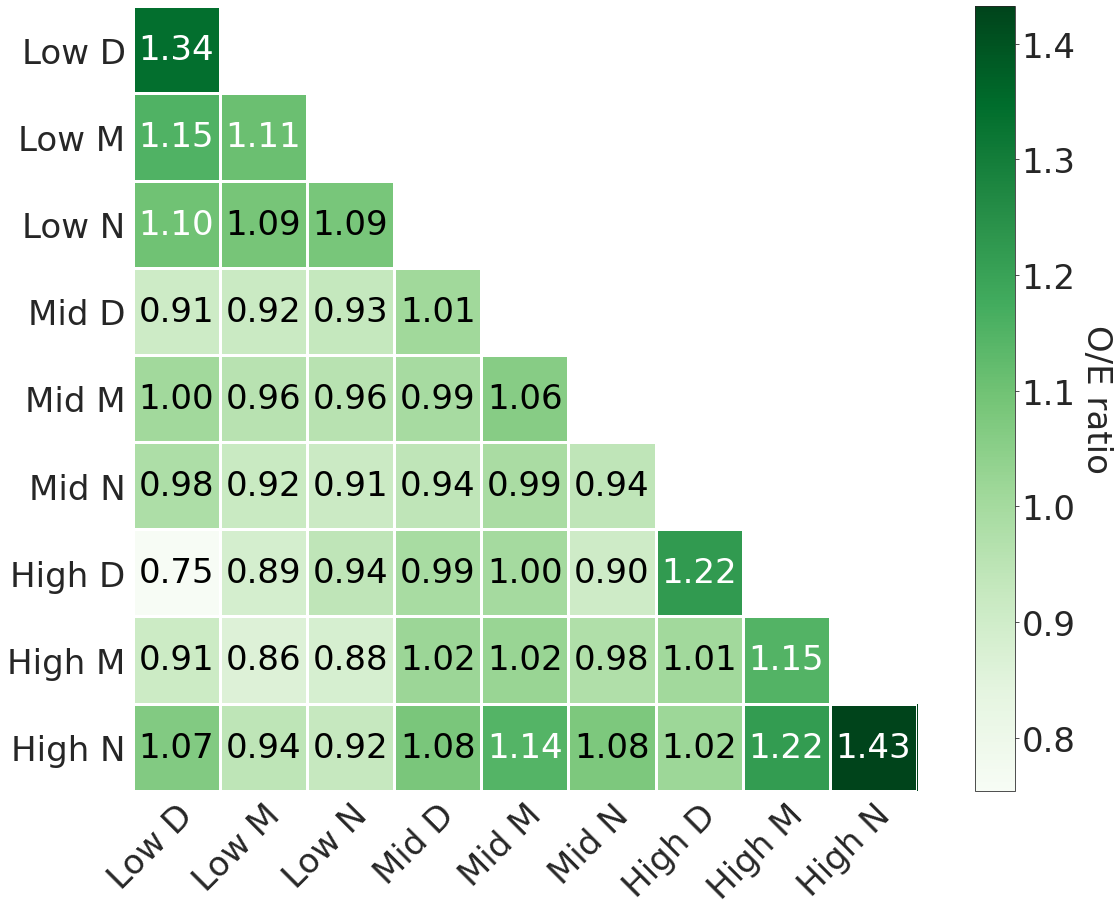

In [129]:
plt.rcParams.update({'figure.figsize' : (18,13.5), 'font.size': 34})
indices_short = ['Low D', 'Low M', 'Low N', 'Mid D', 'Mid M', 'Mid N', 'High D', 'High M', 'High N']

# indices = ['Diversity low', 'Mainstreaminess low', 'Novelty low', 'Diversity medium', 'Mainstreaminess medium', 'Novelty medium', 'Diversity high', 'Mainstreaminess high', 'Novelty high']
metric = 'real_expected_ratio'
# cosine_similarity_freebase_nmf_mean
# cosine_similarity_allmusic_mean
# cosine_similarity_UAM_nmf_mean
values = np.zeros((len(indices), len(indices)))
for i in range(len(indices)):
    for j in range(len(indices)):
        if j > i:
            values[i,j] = np.nan
        else:
            # It can be averaged over multiple random graphs
            values[i,j] = (results_shuffled_mul[(indices[i], indices[j])][metric]) # + \
            # results_shuffled_mul_1[(indices[i], indices[j])][metric] + \
            # results_shuffled_mul_2[(indices[i], indices[j])][metric] + \
            # results_shuffled_mul_3[(indices[i], indices[j])][metric] + \
            # results_shuffled_mul_4[(indices[i], indices[j])][metric] + \
            # results_shuffled_mul_5[(indices[i], indices[j])][metric] + \
            # results_shuffled_mul_6[(indices[i], indices[j])][metric] + \
            # results_shuffled_mul_7[(indices[i], indices[j])][metric] + \
            # results_shuffled_mul_8[(indices[i], indices[j])][metric] + \
            # results_shuffled_mul_9[(indices[i], indices[j])][metric]) / 10


fig, ax = plt.subplots()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

im, cbar = heatmap(values, indices_short, indices_short, ax=ax,
                   cmap="Greens", cbarlabel="O/E ratio",
                  title='')
texts = annotate_heatmap(im, valfmt="{x:.2f}")

fig.tight_layout()
plt.savefig('../figures/shuffled_mul_homophily_all_user_groups.pdf',dpi=300, bbox_inches = "tight")

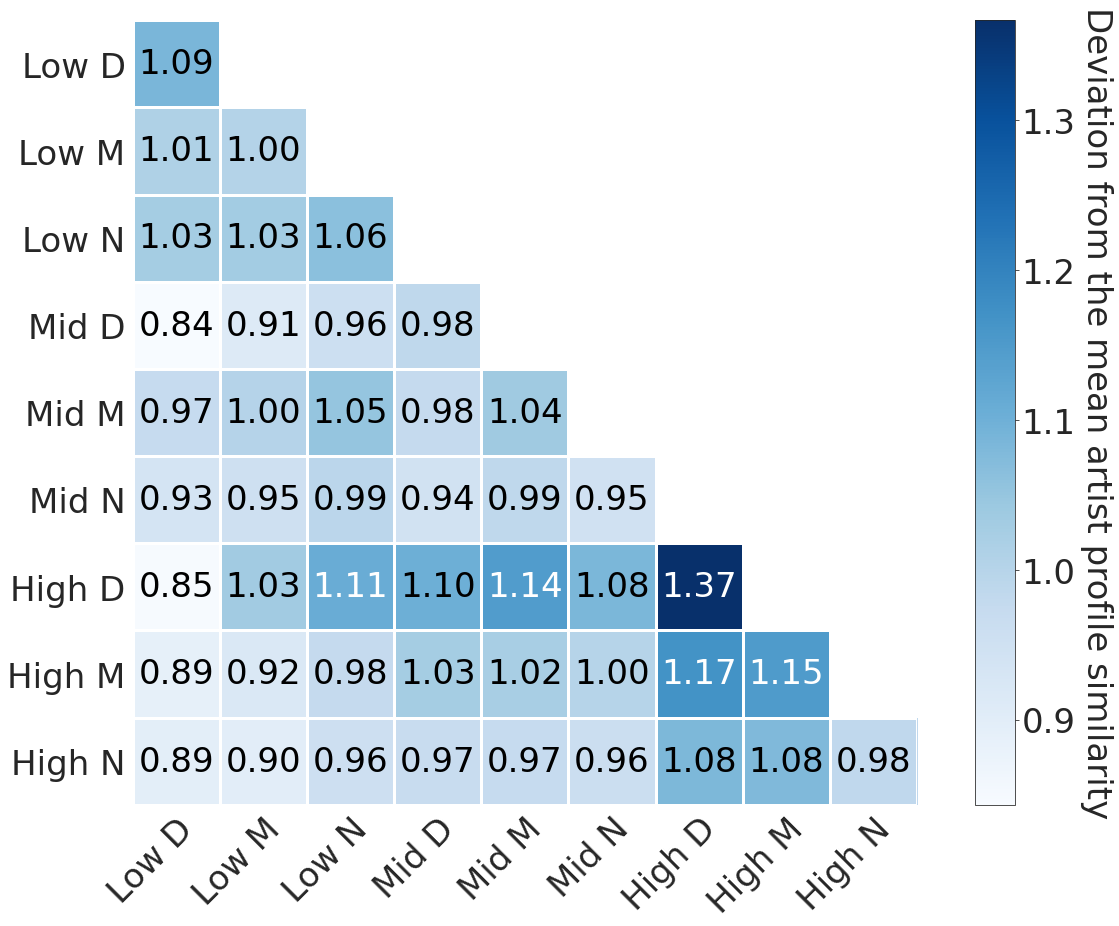

In [130]:
plt.rcParams.update({'figure.figsize' : (18,13.5), 'font.size': 34})
indices_short = ['Low D', 'Low M', 'Low N', 'Mid D', 'Mid M', 'Mid N', 'High D', 'High M', 'High N']
# indices = ['Diversity low', 'Mainstreaminess low', 'Novelty low', 'Diversity medium', 'Mainstreaminess medium', 'Novelty medium', 'Diversity high', 'Mainstreaminess high', 'Novelty high']
metric = 'cosine_similarity_UAM_nmf_diff_to_mean'
# cosine_similarity_freebase_nmf_mean
# cosine_similarity_allmusic_mean
# cosine_similarity_UAM_nmf_mean
values = np.zeros((len(indices), len(indices)))
for i in range(len(indices)):
    for j in range(len(indices)):
        if j > i:
            values[i,j] = np.nan
        else:
            values[i,j] = (results_shuffled_mul[(indices[i], indices[j])][metric]) # + \
            # results_shuffled_mul_1[(indices[i], indices[j])][metric] + \
            # results_shuffled_mul_2[(indices[i], indices[j])][metric] + \
            # results_shuffled_mul_3[(indices[i], indices[j])][metric] + \
            # results_shuffled_mul_4[(indices[i], indices[j])][metric] + \
            # results_shuffled_mul_5[(indices[i], indices[j])][metric] + \
            # results_shuffled_mul_6[(indices[i], indices[j])][metric] + \
            # results_shuffled_mul_7[(indices[i], indices[j])][metric] + \
            # results_shuffled_mul_8[(indices[i], indices[j])][metric] + \
            # results_shuffled_mul_9[(indices[i], indices[j])][metric]) / 10

fig, ax = plt.subplots()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

im, cbar = heatmap(values, indices_short, indices_short, ax=ax,
                   cmap="Blues", cbarlabel="Deviation from the mean artist profile similarity",
                  title='')
texts = annotate_heatmap(im, valfmt="{x:.2f}")

fig.tight_layout()
plt.savefig('../figures/shuffled_mul_UAM_nmf_mean_cosine_all_user_groups_ratio.pdf',dpi=300, bbox_inches = "tight")